<a href="https://colab.research.google.com/github/AlexeyTri/Mathematics/blob/main/Mathematics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math as m
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt

In [2]:
import sympy
from sympy import *

# Функции для раздела "Производная"

In [23]:
# tangent возвращает уравнение касательной к графику заданной функции в точке с абциссой х = х0
def tangent(y, x0):
    """
    Строит уравнение касательной к графику функции у(х) в точку х0
    (х0, у0) - точка касания
    """
    y0 = y.subs(x, x0)
    """
    Касательная с уравнением y = kx + b проходит через точку M(x0, y0), а также через точку N(x0+1, y0+k) k - угловой коэффициент
    """
    x1 = x0 + 1
    """
    Производная функции при x=x0
    """
    k = diff(y, x).subs(x, x0)
    y1 = y0 + k
    """
    Касательная это прямая проходящая через точки M, N
    """
    return Line ((x0, y0), (x1, y1))

*Уравнение касательной к графику функции f(x) в точке $x_{0}$:

$y_{касат} = f'(x_{0})(x - x_{0}) + (x - x_{0})$

*

In [4]:
# tangent_from_point возвращает уравнение касательной проведенной из заданной точки к графику заданной функции
def tangent_from_point(y, x1, y1):
    """
    y - уравнение кривой
    (х0, у0) - точка касания
    (х1, у1) - точка через которую должна пройти касательная
    """
    x, x0, y0 = symbols('x, x0, y0')
    """
    Производная у при х = х0
    """
    y_diff = diff(y, x).subs(x, x0)
    print('y_diff:', {y_diff})
    """
    Уравнение касательной
    """
    y_tang = y_diff*(x - x0) + y0
    print('y_tang:', {y_tang})
    """
    Крива у(х) проходит через точку (х0, у0)
    """
    first_eq = y.subs(x, x0) - y0
    print('first_eq:', {first_eq})
    """
    Касательная проходит через точку (х1, у1)
    """
    second_eq = y_tang.subs(x, x1) - y1
    print('second_eq:', {second_eq})
    """
    Решаем систему
    """
    res = solve([first_eq, second_eq], [x0, y0], dict=True)
    print(len(res))
    if len(res) == 1:
        x01 = res[0][x0]
        y01 = res[0][y0]
        return Line((x01, y01), (x1, y1))
    else:
        x021 = res[0][x0]
        y021 = res[0][y0]
        x022 = res[1][x0]
        y022 = res[1][y0]
        return Line((x021, y021), (x1, y1)), Line((x022, y022), (x1, y1))


In [5]:
# study_function осуществляет полное исследование функции одной переменной
def study_fucntion(y, singp=0, asimp=True):
    """
    y - функции
    singp - кортеж особых точек
    """
    """
    Поиск вертикальных асимптот
    """
    if asimp:
        if singp != 0:
            for i in range(0, len(singp)):
                lim = limit(y, x, singp[i])
                if abs(lim) == oo:
                    print("Вертикальная асимптота: x = ", {singp[i]})
        """Поиск горизонатльных асимптот"""

        lp = limit(y, x, +oo)
        lm = limit(y, x, -oo)
        if (abs(lp) != oo) & (abs(lm) != oo):
            print("Горизонтальная асимптота у = ", lp)
        elif (abs(lp) != oo) & (abs(lm) == oo):
            print("Горизонтальная асимптота при x -> +oo, y = ", lp)
        elif (abs(lp) == oo) & (abs(lm) != oo):
            print("Горизонтальная асимптота при x -> -oo, y =", lm)
        """Поиск наклонная асимптота"""
        kp = limit(y/x, x, oo, '+')
        km = limit(y/x, x, oo, '-')
        if (kp != 0) & (km != 0):
            if (kp != oo) & (km != oo):
                b = limit(y-kp*x, x, oo)
                if b != oo:
                    print('Наклонная асимптота: у = ', kp*x + b)
            elif (kp != oo) & (km == oo):
                b = limit(y - kp*x, x, oo, '+')
                if b != oo:
                    print('Наклонная асимптота при x -> +oo: y = ', kp*x + b)
    """Производные"""
    y_ = diff(y, x)
    print("y': ", y_.simplify())
    y2_ = diff(y, x, 2)
    print("y'': ", y2_.simplify())
    y3_ = diff(y, x, 3)
    """Поиск критичеких точек"""
    roots_diff = solve(y_, x)
    k = len(roots_diff)
    if k > 0:
        for i in range(0, k):
            """Провeрка второй производной"""
            ri = roots_diff[i]
            y2_0 = y2_.subs(x, ri)
            if y2_0 > 0:
                print("x = %s - точка минимума, y_min = %s" % (ri, y.subs(x, ri)))
            elif y2_0 < 0:
                print("x = %s - точка максимума, y_max = %s" % (ri, y.subs(x, ri)))
            else:
                """Проверка, не является ли критическая точка, точкой перегиба"""
                y3_0 = y3_.subs(x, ri)
                if y3_0 != 0:
                    print("x = %s - точка перегиба, y(x) = %s" % (ri, y.subs(x, ri)))
                else:
                    print("В критической точке %s тебуется дополнительное исследование" % ri)
    """Поиск точек перегиба"""
    roots_2diff = solve(y2_)
    k = len(roots_2diff)
    if k > 0:
        for i in range(0, k):
            ri = roots_2diff[i]
            y3_0 = y3_.subs(x, ri)
            y_0 = y_.subs(x, ri)
            if (y3_0 != 0) & (y_0 != 0):
                print("x = %s - точка перегиба, y(x) = %s" % (ri, y.subs(x, ri)))

In [6]:
#diff_direct - возврщает координаты (в виде символьных выражений и числовые) производной по направлению функции двух или трех переменных
def diff_direct(u, l, M=0):
    """Производная по напаравлению двух или трех переменных. Еслди задана точка М, вычисляется значение производной в точке.
    f-функция
    l-направление: Line
    M-точка: Point """
    x, y, z = symbols('x y z')
    """Функция двух переменных"""
    if len(l.direction) == 2:
        u_x = diff(u, x)
        u_y = diff(u, y)
        Ox = Line((0,0), (1,0))
        Oy = Line((0,0), (0,1))
        """Направляющие косинусы"""
        cos_a = cos(Ox.angle_between(l))
        cos_b = cos(Oy.angle_between(l))
        u_l = u_x*cos_a + u_y*cos_b
        if M:
            u_x_M = diff(u, x).subs({x: M.x, y: M.y})
            u_y_M = diff(u, y).subs({x: M.x, y: M.y})
            u_l_m = u_x_M * cos_a + u_y_M * cos_b
            return u_l, u_l_m
        else:
            return u_l

        """Функция трех переменных"""
    if len(l.direction) == 3:
        u_x = diff(u, x)
        u_y = diff(u, y)
        u_z = diff(u, z)
        Ox = Line((0,0,0), (1,0,0))
        Oy = Line((0,0,0), (0,1,0))
        Oz = Line((0,0,0), (0,0,1))
        """Направляющие косинусы"""
        cos_a = cos(Ox.angle_between(l))
        cos_b = cos(Oy.angle_between(l))
        cos_c = cos(Oz.angle_between(l))
        u_l = u_x*cos_a + u_y*cos_b + u_z*cos_c
        if M:
            u_x_M = diff(u, x).subs({x: M.x, y: M.y, z:M.z})
            u_y_M = diff(u, y).subs({x:M.x, y:M.y, z:M.z})
            u_z_M = diff(u, y).subs({x: M.x,y:M.y, z: M.z})
            u_l_M = u_x_M * cos_a + u_y_M * cos_b + u_z_M*cos_c
            return u_l, u_l_M


In [7]:
def tanget_plane(F, M):
    """Находит уравнение касательной плоскости и нормали к поверхности F(x, y, z) в точке М"""

    F_diff_x = diff(F, x).subs({x:M.x, y:M.y, z:M.z})
    F_diff_y = diff(F, y).subs({x:M.x, y:M.y, z:M.z})
    F_diff_z = diff(F, z).subs({x:M.x, y:M.y, z:M.z})

    """Вектор нормали к плоскости"""
    n = Point(F_diff_x, F_diff_y, F_diff_z)

    """Касательная плоскость проходит через точку М к вектору нормали"""
    p = Plane(M, normal_vector=n).equation()

    """Нормаль проходит через точку М и точку К = М + n"""
    K = Point(M.x + n.x, M.y + n.y, M.z + n.z)
    l_n = Line(M, K).arbitrary_point()
    return p, l_n

*critical_points()*, return:

1. критические точки заданной функции
2. $A = f''_{xx}$
3. $Δ = f''_{xx}*f''_{yy} - (f''_{xy})^2$

In [8]:
def critical_points(z):
    z_x = diff(z, x)
    z_y = diff(z, y)

    cr_point = solve([z_x, z_y], [x, y], dict=True)
    A = diff(z, x, 2)
    B = diff(z, x, y)
    C = diff(z, y, 2)
    D = A*C - B**2
    return cr_point, A, D

In [9]:
# используя символьные выражения для признаков A и DELTA (D), возвращает значения этих признаков в заданной критической точке
def suff_indic(A, D, cr_point):
    A0 = A.subs(cr_point)
    D0 = D.subs(cr_point)
    return D0, A0

*critical_points_ondotional()*, return:

1. критические точки функции Лагранжа:

$L(x,y) = f(x,y) + λ*g(x, y)$

2. выражение определителя:

$
\det Δ = -
\begin{vmatrix}
0 & g'_x & g'_y \\
g'_x & L''_{xx} & L''_{xy} \\
g'_y & L''_{xy} & L''_{yy}
\end{vmatrix}
$

In [10]:
# поиск условного экстремума
def critical_points_conditional(f, g):
    """Нахождение критических точек функции Лагранжа и определителя Delta
    f- целевая функция
    g- условие
    """

    """Функция Лагранжа"""
    lam = symbols('lam')
    L = f + lam*g

    """Производная перваого порядка"""
    gradL = [diff(L, c) for c in [x, y]]

    """Производная по lam совпадает с g"""
    """Набор производных"""
    eqs = gradL + [g]


    """Посик критических точек -> приравнивая производные к нулю"""
    cr_point = solve(eqs, [x, y, lam], dict=True)
    """Производные функции g"""
    g_x = diff(g, x)
    g_y = diff(g, y)

    """Производные второго порядка"""
    L_xx = diff(L, x, 2)
    L_xy = diff(L, x, y)
    L_yy = diff(L, y, 2)

    """Определитель Delta"""
    M = Matrix([[0, g_x, g_y], [g_x, L_xx, L_xy], [g_y, L_xy, L_yy]])
    D = -det(M)
    return cr_point, D

# **Производная 2**

Уравнение касательной к графику фунцкии в точке $x_0$:

$y = f'(x)(x - x_0) + f(x_0)$



*Пример 8: провести касательную к графику функции $y = x^2$ в точке $x_0 = 2$*

In [24]:
x = symbols('x')
y = x**2
x0 = 2
tangent(y, x0).equation()

-4*x + y + 4

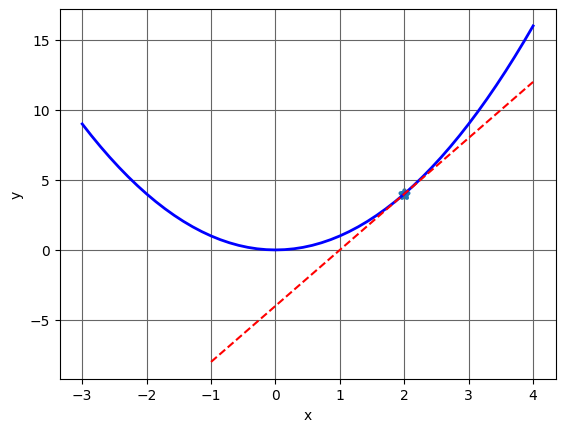

In [33]:
import matplotlib.pyplot as plt

x = np.linspace(-3, 4, 50)
y1 = x**2
plt.plot(x, y1, lw=2, c='b')

x = np.linspace(-1, 4, 50)
y2 = 4*x - 4
plt.plot(x, y2, '--', c='r')
plt.scatter(2, 4, marker='*', linewidths=3)

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True, linestyle='-', c='0.4')
plt.show()

*Пример 9: найти уравнение касательной и нормали к графику функции $y = 6\sqrt[3]{x}+2\sqrt{x}$ в точке $x_0 = 64$*

In [34]:
x = symbols('x')
y = 6*x**(1/3) + 2*x**(1/2)
x0 = 64
y0 = y.subs(x, x0)

kas = tangent(y, 64)
kas.equation()

-x/4 + y - 24

In [38]:
p = Point(x0, y0)
kas.perpendicular_line(p).equation()

-x - y/4 + 74

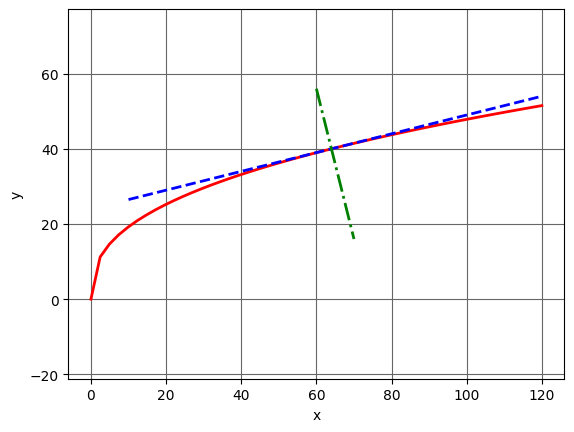

In [40]:
x = np.linspace(0, 120, 50)
plt.plot(x, (6*x**(1/3) + 2*x**(1/2)), lw=2, c='r')

x = np.linspace(10, 120, 50)
y2 = x/4 + 24
plt.plot(x, y2, '--', lw=2, c='b')

x = np.linspace(60, 70, 50)
y4 = 296 - 4*x
plt.plot(x, y4, '-.', lw=2, c='g')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle ='-', color='0.4')
plt.axis('equal')
plt.show()

*Пример 10: из точки А(-4,0) провести касательную к кривой $y=\sqrt{x}$*

In [41]:
x1, y1, x = symbols('x1, y1, x')
x1 = -4
y1 = 0
y = sqrt(x)
tangent_from_point(y, x1, y1).equation()

y_diff: {1/(2*sqrt(x0))}
y_tang: {y0 + (x - x0)/(2*sqrt(x0))}
first_eq: {sqrt(x0) - y0}
second_eq: {y0 + (-x0 - 4)/(2*sqrt(x0))}
1


2*x - 8*y + 8

In [65]:
x, y = symbols('x y')
y_sqrt = sqrt(x) - y
y_line = 2*x - 8*y + 8

res = solve([y_sqrt, y_line], [x, y])

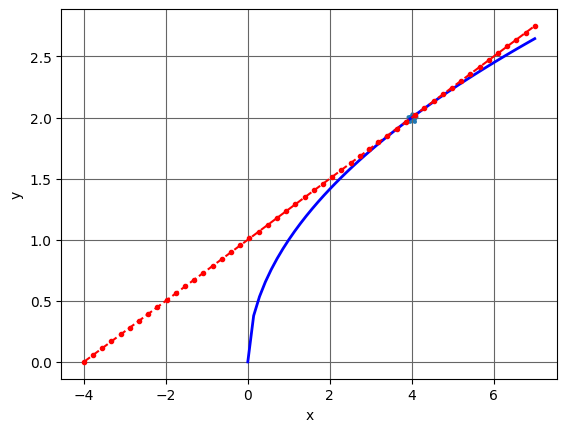

In [64]:
x = np.linspace(0, 7, 50)
y1 = np.sqrt(x)
plt.plot(x, y1, lw=2, c='b')

x = np.linspace(-4, 7, 50)
y2 = x/4 + 1
plt.plot(x, y2,'--.', c='r')
plt.scatter(res[0][0], res[0][1], marker='*', linewidths=3)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Исследование функции:

1. в точке экстремума $y'(x)=0$
2. функция возрастает(убывает), если $y'(x)>0 (<0)$
3. в точке перегиба $y''(x) = 0$
4. функция выпукла вниз(вверх), если $y''(x)>0 (<0)$

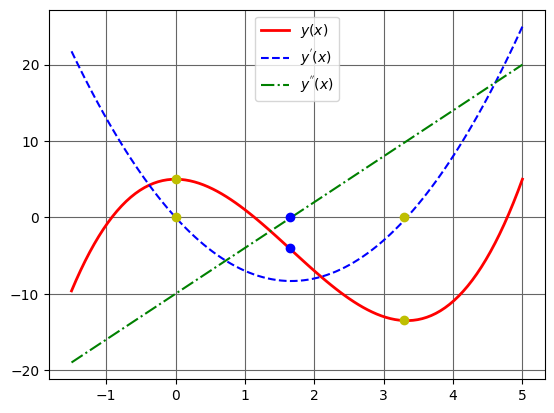

In [66]:
t = np.linspace(-1.5, 5, 100)
f = t**3 - 5*t**2 + 5
fd = 3*t**2 - 10*t
fdd = 6*t - 10

plt.plot(t, f, lw=2, c='r', label="$y(x)$")
plt.plot(t, fd, '--', c='b', label="$y^{'}(x)$")
plt.plot(t, fdd, '-.', c='g', label="$y^{''}(x)$")

plt.plot([0], [0], 'o', color='y')
plt.plot([0], [5], 'o', color='y')
plt.plot([3.3], [0], 'o', color='y')
plt.plot([3.3], [-13.4], 'o', color='y')
plt.plot([1.65], [0], 'o', color='b')
plt.plot([1.65], [-4], 'o', color='b')
plt.grid(True, linestyle='-', color='0.4')
plt.legend()
plt.show()

*Пример 11: решить неравенство $x^2<3$*

In [67]:
x, y = symbols('x, y')
solve(x**2 < 3)

(x < sqrt(3)) & (-sqrt(3) < x)

*Пример 12: решить уравнение $x^2 - y^2 = 0$*

In [73]:
solve(Eq(x**2 - y**2, 0), x)

[-y, y]

*Пример 13: исследовать функцию на экстремум*

$y = e^{-x}-e^{-2x}$


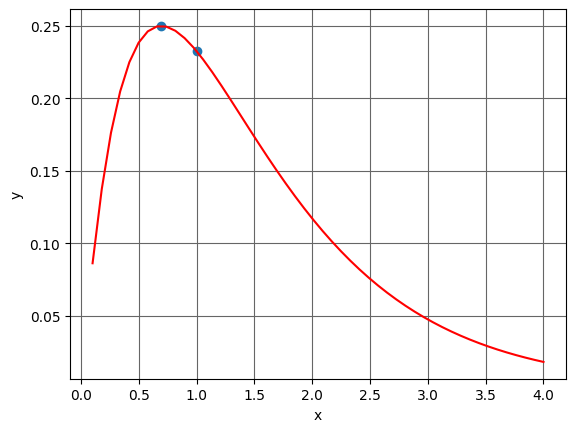

In [97]:
f = lambda x: np.exp(-x) - np.exp(-2*x)

x = np.linspace(0.1, 4, 50)
plt.plot(x, f(x), 'r')
plt.scatter([res.x[0],1], [f(res.x)[0], f(1)])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [94]:
f_max = lambda x: -(np.exp(-x) - np.exp(-2*x))
res = scipy.optimize.minimize(f_max, 1)
('x_max: %.4f f_max: %.3f' % (res.x, f(res.x)))

<ipython-input-94-f9b828aa1291>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ('x_max: %.4f f_max: %.3f' % (res.x, f(res.x)))


'x_max: 0.6931 f_max: 0.250'

In [103]:
x = symbols('x')
y = exp(-x) - exp(-2 * x)
res = solve(diff(y, x))[0]
res, y.subs(x,res), diff(y, x, 2).subs(x, res)

(log(2), 1/4, -1/2)

In [ ]:
# пример 14
x = symbols('x')
y = x**3
x0 = solve(diff(y,x),x)[0]

y0=y.subs(x, x0)
x0, y0
diff(y, x, 3).subs(x, x0)

6

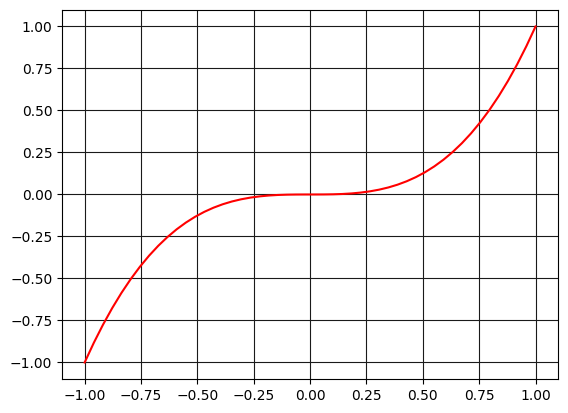

In [ ]:
x = np.linspace(-1, 1, 50)
plt.plot(x, x**3, 'r')
plt.grid(True, linestyle='-', color='0.1')
plt.show()

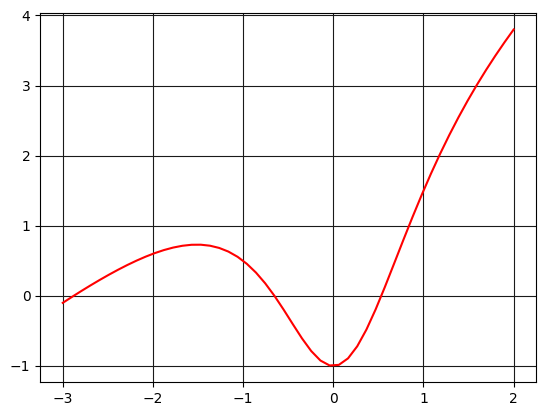

In [ ]:
# Пример 15
f = lambda x: (x**3 + 3*x**2 - 1)/(x**2 + 1)
x = np.linspace(-3, 2, 50)
plt.plot(x, f(x), 'r')
plt.grid(True, linestyle='-', color='0.1')
plt.show()

In [ ]:
res = scipy.optimize.minimize(f, 1)
f_min = f(res.x)
f_min

array([-1.])

In [ ]:
f_m = lambda z: -(z**3 + 3*z**2 - 1)/(z**2 + 1)
res = scipy.optimize.minimize(f_m, -2)
res.x, f(res.x)

(array([-1.51274535]), array([0.73088201]))

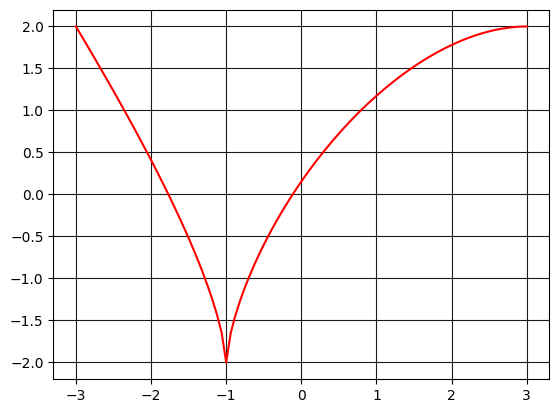

In [ ]:
# пример 16
fun = lambda x: np.cbrt(2*(x+1)**2*(5-x)) - 2
x = np.linspace(-3, 3, 100)
plt.plot(x, fun(x), 'r')
plt.grid(True, linestyle='-', color='0.1')
plt.show()

In [ ]:
res = scipy.optimize.minimize(fun, -1.5)
res.x

array([-0.49])

In [ ]:
res = scipy.optimize.minimize(fun, -1.001)
res.x

array([-1.001])

In [ ]:
res = scipy.optimize.minimize(fun, -1)
res.x, fun(res.x)

(array([-1.]), array([-2.]))

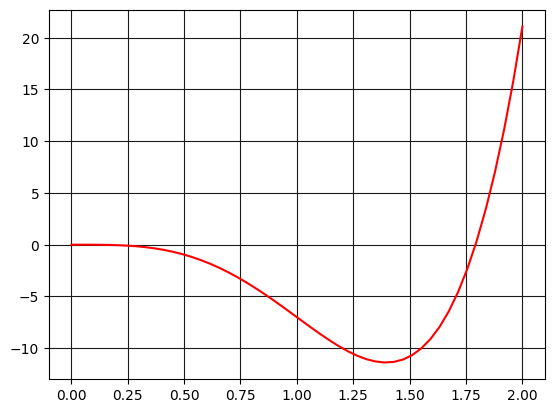

In [ ]:
# пример 17
f = lambda x: x**4*(12*np.log(x) - 7)
x = np.linspace(0.001, 2, 50)
plt.plot(x, f(x), 'r')
plt.grid(True, linestyle='-', color='0.1')
plt.show()

In [ ]:
x = symbols('x')
y = x**4*(12*log(x) - 7)
y_diff2 = diff(y, x,2)
y_diff2
x_inflex = solve(y_diff2, x)
x_inflex

[0, 1]

In [ ]:
x = symbols('x')
y_diff = diff(y, x)
y_diff

4*x**3*(12*log(x) - 7) + 12*x**3

In [ ]:
y_diff2.subs(x, 0.25), y_diff2.subs(x, 1.5)

(-12.4766492500790, 131.370695027045)

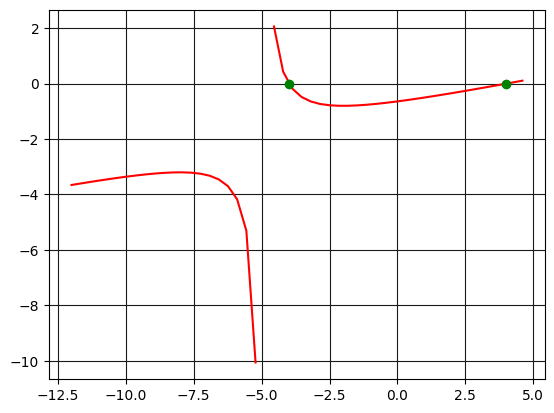

In [ ]:
# пример 18
f = lambda x: (x**2 - 16)/(5*(x+5))

x = np.linspace(-12, 4.6, 50)
x[(x>-5.2)&(x<-4.8)] = np.nan

plt.plot(x, f(x), 'r')
plt.grid(True, linestyle='-', color='0.1')
plt.plot([-4], [0],'o', c='g')
plt.plot([4], [0],'o', c='g')
plt.show()

In [ ]:
# пересечение с осями
x = symbols('x')
y = (x**2-16)/(5*(x+5))
y.subs(x, 0)

-16/25

In [ ]:
solve(y, x)

[-4, 4]

In [ ]:
limit(y, x, -5)

oo

In [ ]:
k = limit(y/x, x, oo)
k

1/5

In [ ]:
b = limit(y-k*x, x, oo)
b
y_kas = 1/5 * x -1

In [ ]:
# экстремумы и интервалы монотонности

y_ = diff(y, x).simplify()
y_
x0 = solve(y_)
x0

[-8, -2]

In [ ]:
x = symbols('x')
y2_ = diff(y, x, 2).simplify()
y2_

18/(5*(x**3 + 15*x**2 + 75*x + 125))

In [ ]:
# формулы сокращенного умножения
x = symbols('x')
expr = x**3 + 15*x**2 + 75*x + 125
factor(expr)

(x + 5)**3

In [ ]:
y2_.subs(x, x0[0]), y2_.subs(x, x0[1])

(-2/15, 2/15)

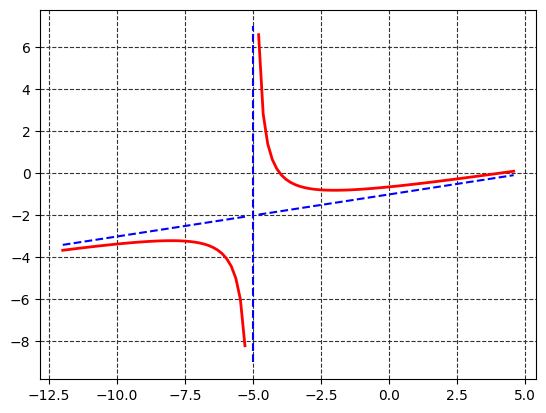

In [ ]:
x = np.linspace(-12, 4.6, 100)
f = lambda x: (x**2 - 16)/(5*(x + 5))
x[(x>-5.2) & (x<-4.8)] = np.nan
y = f(x)

plt.plot(x, y, c='r', lw=2)

y = x/5 - 1
plt.plot(x, y, '--', c='b')
plt.plot([-5, -5], [-9, 7], '--', c='b')
plt.grid(True, linestyle='--', c='0.2')
plt.show()

In [ ]:
# Пример 19
x = symbols('x')
y = x**2*sqrt(abs(x + 3))/3

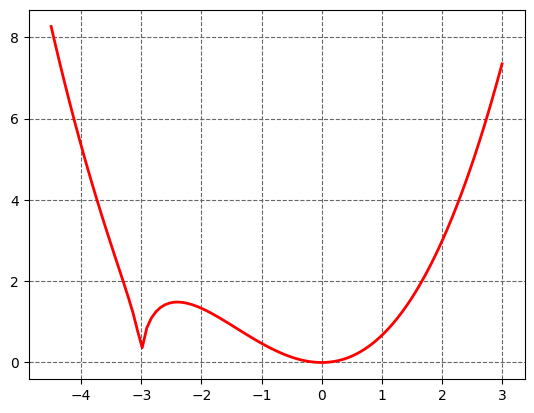

In [ ]:
f = lambda x: x**2*np.sqrt(abs(x + 3))/3
x = np.linspace(-4.5, 3, 100)

plt.plot(x, f(x), c='r', lw=2)
plt.grid(True, c='0.4', linestyle='--')
plt.show()

In [ ]:
# область определения: вся числовая прямая
# пересечение с осью оу

y.subs(x, 0)

0

In [ ]:
y1 = x**2*sqrt(-x-3)/3
y2 = x**2*sqrt(x+3)/3
solve(y1, x), solve(y2, x)

([-3, 0], [-3, 0])

In [ ]:
# асимптоты
limit(y, x, oo), limit(y/x, x, oo)

(oo, oo)

In [ ]:
#экстремумы и интервалы монотонности
y1_ = diff(y1, x).simplify()
y2_ = diff(y2, x).simplify()

y2_

x*(5*x + 12)/(6*sqrt(x + 3))

In [ ]:
limit(y2_, x, -3, '+')

oo

In [ ]:
x0 = solve(y1_, x)
x0

[-12/5, 0]

In [ ]:
y12_ = diff(y1_, x).simplify()
y12_

sqrt(-x - 3)*(5*x**2 + 24*x + 24)/(4*(x**2 + 6*x + 9))

In [ ]:
y22_ = diff(y2_, x).simplify()
y22_

(5*x**2 + 24*x + 24)/(4*(x + 3)**(3/2))

In [ ]:
y22_.subs(x, x0[0]).simplify(), y22_.subs(x, x0[1]).simplify()

(-2*sqrt(15)/3, 2*sqrt(3)/3)

In [ ]:
# интервалы выпуклости и точки перегиба

xp1 = solve(y12_)
xp2 = solve(y22_)
xp1, xp2

([-12/5 - 2*sqrt(6)/5, -12/5 + 2*sqrt(6)/5],
 [-12/5 - 2*sqrt(6)/5, -12/5 + 2*sqrt(6)/5])

In [ ]:
diff(y1, x, 3).subs(x, xp1[0].evalf(5)), diff(y1, x, 3).subs(x, xp1[1].evalf(5))

(-10.465, 1.2336*I)

In [ ]:
x = symbols('x', real=True)
y1 = x**2*sqrt((-x-3)/3)
y2 = x**2*sqrt((x+3)/3)
study_fucntion(y2, asimp=False)

y':  sqrt(3)*x*(5*x + 12)/(6*sqrt(x + 3))
y'':  sqrt(3)*(5*x**2 + 24*x + 24)/(4*(x + 3)**(3/2))
x = -12/5 - точка максимума, y_max = 144*sqrt(5)/125
x = 0 - точка минимума, y_min = 0
x = -12/5 - 2*sqrt(6)/5 - точка перегиба, y(x) = (-12/5 - 2*sqrt(6)/5)**2*sqrt(1/5 - 2*sqrt(6)/15)
x = -12/5 + 2*sqrt(6)/5 - точка перегиба, y(x) = (-12/5 + 2*sqrt(6)/5)**2*sqrt(1/5 + 2*sqrt(6)/15)


**Частные производные**

In [ ]:
# Пример 20
x, y = symbols('x, y')
z = x*y**2 + exp(-x)
diff(z, x, 2), diff(z, y, 2)

(exp(-x), 2*x)

In [ ]:
# Пример 21
x, y = symbols('x, y')
z = sin(x)*cos(y)
diff(z, x), diff(z, y), diff(z, x, 2, y)

(cos(x)*cos(y), -sin(x)*sin(y), sin(x)*sin(y), -sin(x))

In [ ]:
# Пример 22
x, y = symbols('x y')
z = 5*ln(x**2 + y**2)
grad = [(diff(z, x)).subs({x:1, y:2}),(diff(z, y).subs({x: 1, y: 2}))]
grad

[2, 4]

In [ ]:
# Пример 23
x, y = symbols('x y')
z = x**2 + x*y +7
grad = [(diff(z, x).subs({x:1, y:-1}),diff(z, y).subs({x:1, y:-1}))]
grad

[(1, 1)]

In [ ]:
# Пример 24
l = Point(3, 4)
l_n = l.distance(Point(0, 0))
cos_a = l.x/l_n
cos_b = l.y/l_n
x, y = symbols('x y')
z = x**2 + y**2
dz_x = diff(z, x).subs({x: 1, y: 1})
dz_y = diff(z, y).subs({x: 1, y: 1})
dz_l = dz_x*cos_a + dz_y*cos_b
dz_l.simplify()

14/5

*Касательная плоскость* к поверхоности в точке $M_0$ называется плоскость, содержащая касательные ко всем кривым, которые принадлежат данной поверхности и проходят через точку $M_0$.

*Нормалью* к поверхности в точке $M_0$ называется прямая, проходящая через данную точку перпендикулярно касательной плоскости.

Если поверхность задана неявным уравнением $F(x,y,z)=0$, то уравнение касательной плоскости к поверхности в точке $M_0(x_0, y_0, z_0)$ находится по формуле

$F'_x(M_0)*(x-x_0)+F'_y(M_0)*(y-y_0)+F'_z(M_0)*(z-z_0)$

$n = (F'_x(M_0), F'_y(M_0), F'_z(M_0))$

$\frac{(x-x_0)}{F'_x(M_0)}=\frac{(y-y_0)}{F'_y(M_0)}=\frac{(z-z_0)}{F'_z(M_0)}$

In [ ]:
# Пример 25
x, y, z = symbols('x y z')
F = x**2 + y**2 + z**2
M = Point(1, 1, 1)
p, l_n = tanget_plane(F, M)
p, l_n

(2*x + 2*y + 2*z - 6, Point3D(2*t + 1, 2*t + 1, 2*t + 1))

In [ ]:
# Пример 26
z = lambda w: (w[0]-1)**2 + (w[1] - 3)**4
res = scipy.optimize.minimize(z, (0, 0))
res.x

array([0.99999999, 2.98725136])

In [ ]:
res = scipy.optimize.minimize(z, (0.999, 3.0001))
res.x

array([0.9999999, 3.0001   ])

In [ ]:
z((1,3))

0

In [ ]:
# Пример 27
z = lambda w: w[0]**4 + w[1]**4 - 2*w[0]**2 + 4*w[0]*w[1] - 2*w[1]**2

Необходимый признак экстремума функции двух переменных: дифференцируемая функция $f(x, y)$ имеет экстремум в точке $(x_0, y_0)$, елси в этой точке обращаются в ноль частные производные: $f'_x(x_0, y_0)=0, f'_y(x_0, y_0)=0$

Достаточный признак: $Δ = A*C - B^2$, где:

$A = f''_{xx}$

$B = f''_{xy}$

$C = f''_{yy}$

$Δ > 0$ - экстремум есть, если А>0, то минимум, иначе максимум
$Δ < 0$ - экстремума нет

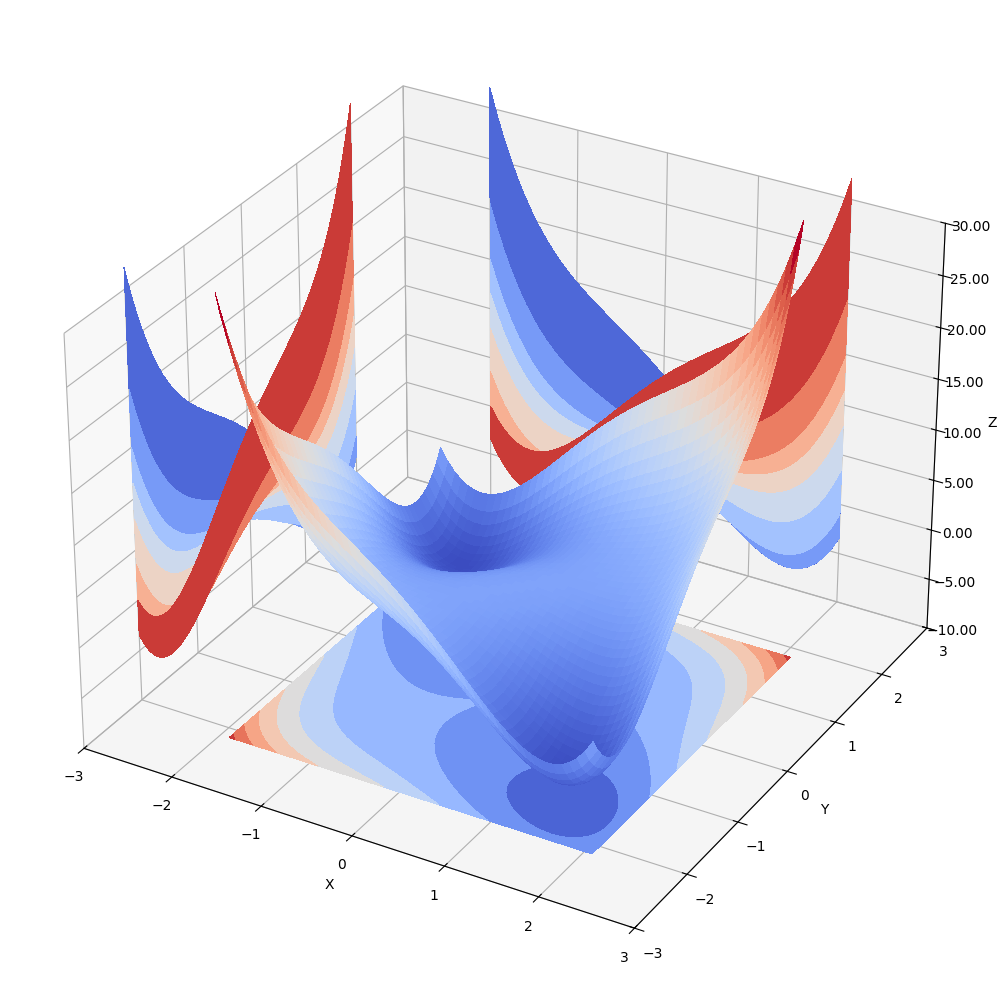

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm

plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10,10))
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
x, y = np.meshgrid(x, y)


Z = z((x, y))

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, Z, cmap='coolwarm',
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_formatter('{x:.02f}')



ax.contourf(x, y, Z, zdir='z', offset=-11, cmap='coolwarm')
ax.contourf(x, y, Z, zdir='x', offset=-3, cmap='coolwarm')
ax.contourf(x, y, Z, zdir='y', offset=3, cmap='coolwarm')
ax.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-10, 30),
       xlabel='X', ylabel='Y', zlabel='Z')


plt.show()

In [ ]:
res = scipy.optimize.minimize(z, (1, -1))
res.x, z(res.x)

(array([ 1.41421356, -1.41421356]), -8.0)

In [ ]:
res = scipy.optimize.minimize(z, (-1, 1))
res.x, z(res.x)

(array([-1.41421357,  1.41421357]), -7.999999999999997)

In [ ]:
x, y = symbols('x y')
z = x**4 + y**4 - 2*x**2 + 4*x*y - 2*y**2
cr_point, A, D = critical_points(z)
cr_point

[{x: 0, y: 0},
 {x: -sqrt(2), y: sqrt(2)},
 {x: sqrt(2), y: -sqrt(2)},
 {x: -sqrt(3)/2 - I/2, y: -sqrt(3)/2 + I/2},
 {x: -sqrt(3)/2 + I/2, y: -sqrt(3)/2 - I/2},
 {x: sqrt(3)/2 - I/2, y: sqrt(3)/2 + I/2},
 {x: sqrt(3)/2 + I/2, y: sqrt(3)/2 - I/2}]

In [ ]:
D0, A0 = suff_indic(A, D, cr_point[0])
D0, A0

(0, -4)

In [ ]:
D1, A1 = suff_indic(A, D, cr_point[1])
D1, A1

(384, 20)

In [ ]:
D2, A2 = suff_indic(A, D, cr_point[2])
D2, A2

(384, 20)

In [ ]:
# второй вариант решения
from sympy import *
x,y = symbols('x, y')
z = x**4 + y**4 - 2*x**2 + 4*x*y - 2*y**2

cr_point, A, D = critical_points(z)
cr_point

[{x: 0, y: 0},
 {x: -sqrt(2), y: sqrt(2)},
 {x: sqrt(2), y: -sqrt(2)},
 {x: -sqrt(3)/2 - I/2, y: -sqrt(3)/2 + I/2},
 {x: -sqrt(3)/2 + I/2, y: -sqrt(3)/2 - I/2},
 {x: sqrt(3)/2 - I/2, y: sqrt(3)/2 + I/2},
 {x: sqrt(3)/2 + I/2, y: sqrt(3)/2 - I/2}]

In [ ]:
D0, A0 = suff_indic(A, D, cr_point[0])
D0, A0

(0, -4)

In [ ]:
D1, A1 = suff_indic(A, D, cr_point[1])
D1, A1

(384, 20)

In [ ]:
D2, A2 = suff_indic(A, D, cr_point[2])
D2, A2

(384, 20)

In [ ]:
z.subs(cr_point[1]), z.subs(cr_point[2])

(-8, -8)

In [ ]:
z = lambda w: w[0]**4 + w[1]**4 - 2*w[0]**2 + 4*w[0]*w[1] - 2*w[1]**2
z((0,0))

0

In [ ]:
S(z((0.1, 0))).n(4)

-0.01990

In [ ]:
S(z((0.1, 0.1))).n(4)

0.0002000

In [ ]:
# пример 28
f = lambda w: w[0] - w[1] + 2

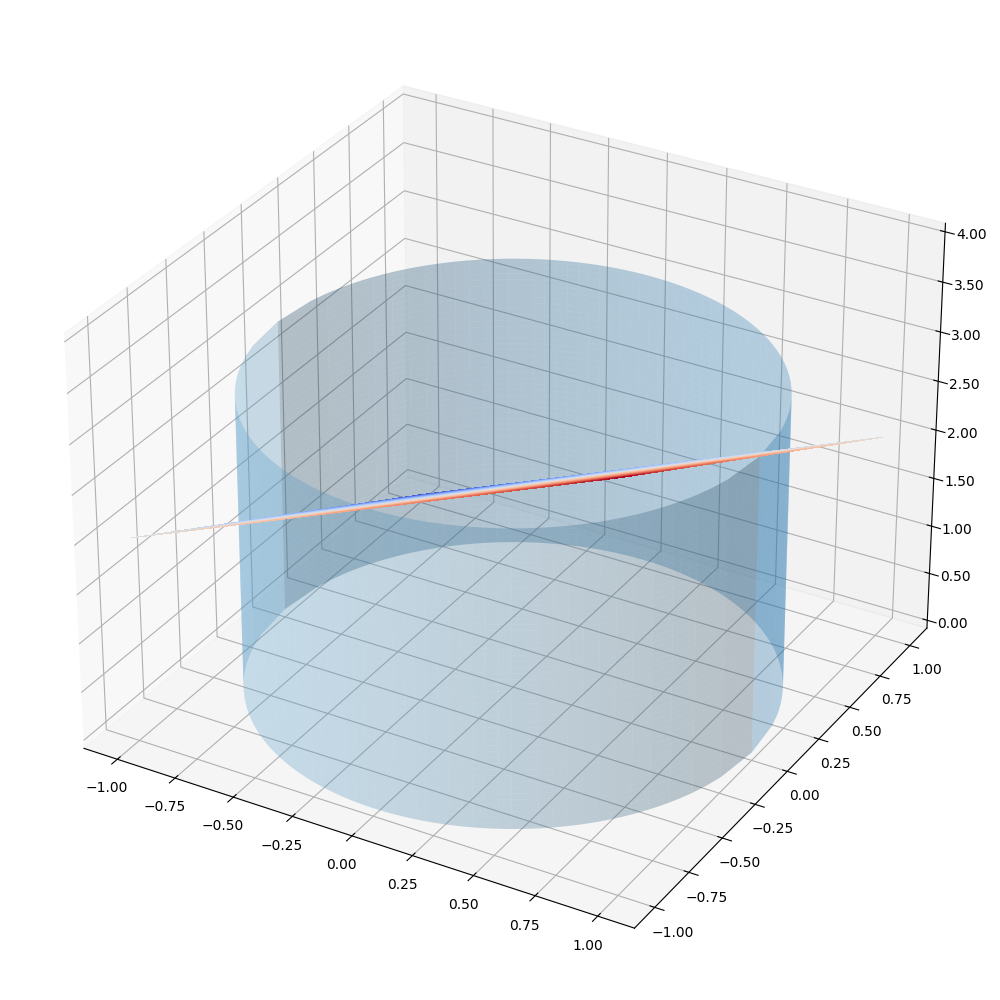

In [ ]:
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10,10))
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
x, y = np.meshgrid(x, y)


z1 = f((x, y))

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z1, cmap='coolwarm',
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_formatter('{x:.02f}')

x = np.linspace(-1, 1, 100)
z = np.linspace(0, 3, 100)
xc, zc = np.meshgrid(x, z)
yc = np.sqrt(1-xc**2)
ax.plot_surface(xc, yc, zc, alpha=0.3)
ax.plot_surface(xc, -yc, zc,alpha=0.3)

"""
ax.contourf(x, y, Z, zdir='z', offset=-11, cmap='coolwarm')
ax.contourf(x, y, Z, zdir='x', offset=-3, cmap='coolwarm')
ax.contourf(x, y, Z, zdir='y', offset=3, cmap='coolwarm')
ax.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-10, 30),
       xlabel='X', ylabel='Y', zlabel='Z')
"""

plt.show()

In [ ]:
cons = ({'type': 'eq', 'fun': lambda w: w[0]**2 + w[1]**2 - 1})
bnds = ((None, None), (None, None))

In [ ]:
res = scipy.optimize.minimize(f, (0, 0), bounds=bnds, constraints=cons)
res.x

array([-0.70710417,  0.70710945])

In [ ]:
f_max = lambda w: -(w[0] - w[1] + 2)
cons = ({'type': 'eq', 'fun': lambda w: w[0]**2 + w[1]**2 - 1})
bnds = ((None, None), (None, None))
res = scipy.optimize.minimize(f_max, (0, 0), bounds=bnds, constraints=cons)
res.x

array([ 0.70710945, -0.70710418])

In [ ]:
x, y, lam = symbols('x y lam')
f = x - y + 2
g = x**2 + y**2 - 1
cr_point, D = critical_points_conditional(f, g)
cr_point

[{lam: -sqrt(2)/2, x: sqrt(2)/2, y: -sqrt(2)/2},
 {lam: sqrt(2)/2, x: -sqrt(2)/2, y: sqrt(2)/2}]

In [ ]:
[D.subs(p) for p in cr_point]

[-4*sqrt(2), 4*sqrt(2)]

In [ ]:
[f.subs(p) for p in cr_point]

[sqrt(2) + 2, 2 - sqrt(2)]